The iris dataset is a classic and very easy multi-class classification dataset.

Import libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
import sklearn
print(sklearn.__version__)

0.24.1


Read files

In [85]:
# load datasets
train = pd.read_csv('https://raw.githubusercontent.com/shabazpatel/iris-classification/master/Iris.csv')
train

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [87]:
train.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [88]:
train.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Heatmap

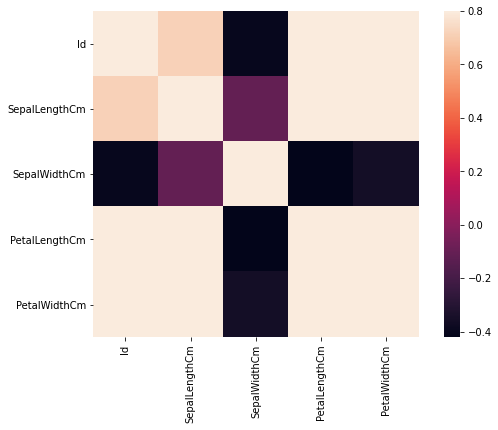

In [89]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corrmat, vmax=.8, square=True);

Graph

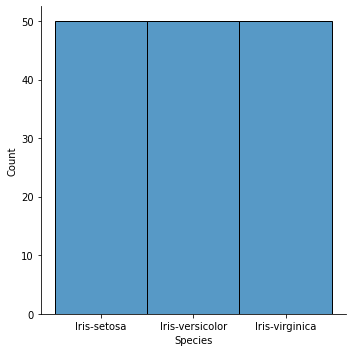

In [90]:
sns.displot(train['Species'])

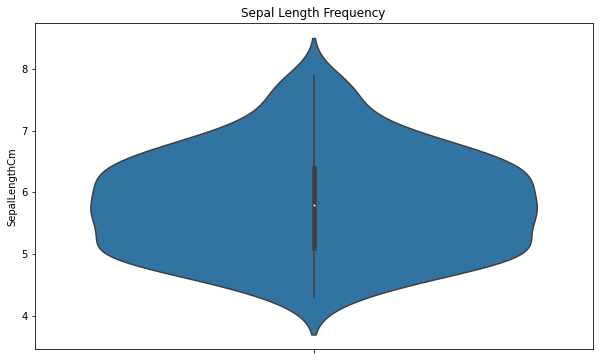

In [91]:
plt.figure(figsize=(10,6))
plt.title("Sepal Length Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["SepalLengthCm"])
plt.show()

In [92]:
sl = train.SepalLengthCm.value_counts()
print("highest: ", sl.index[0], ", lowest: ", sl.index[-1])

highest:  5.0 , lowest:  7.1


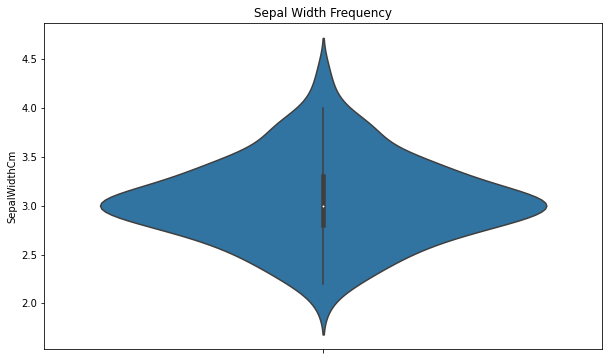

In [93]:
plt.figure(figsize=(10,6))
plt.title("Sepal Width Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["SepalWidthCm"])
plt.show()

In [94]:
sw = train.SepalLengthCm.value_counts()
print("highest: ", sw.index[0], ", lowest: ", sw.index[-1])

highest:  5.0 , lowest:  7.1


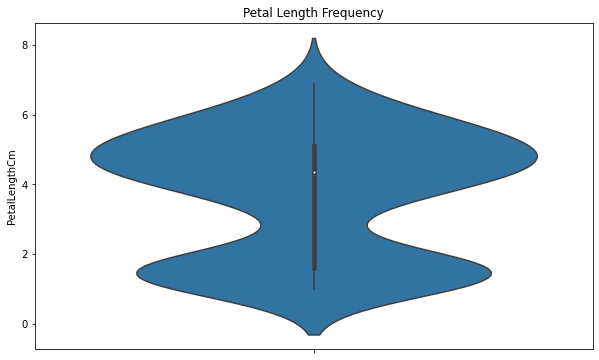

In [95]:
plt.figure(figsize=(10,6))
plt.title("Petal Length Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["PetalLengthCm"])
plt.show()

In [96]:
pl = train.PetalLengthCm.value_counts()
print("highest: ", pl.index[0], ", lowest: ", pl.index[-1])

highest:  1.5 , lowest:  1.0


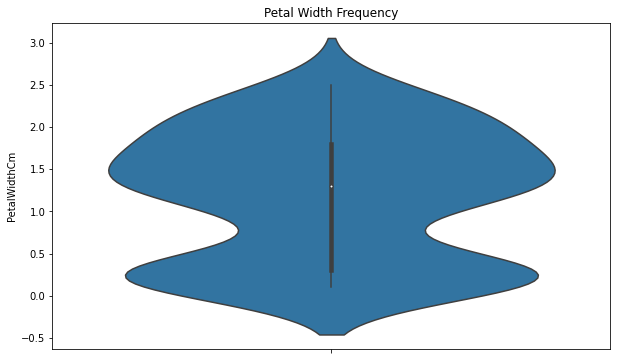

In [97]:
plt.figure(figsize=(10,6))
plt.title("Petal Width Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["PetalWidthCm"])
plt.show()

In [98]:
pw = train.PetalWidthCm.value_counts()
print("highest: ", pw.index[0], ", lowest: ", pw.index[-1])

highest:  0.2 , lowest:  0.5


Ordinal encode iris

In [99]:
iris1={'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}
train.Species=train.Species.map(iris1)

Define X and y

In [100]:
y = train.Species
X = train.drop(['Species'], axis=1)

In [101]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [102]:
y

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: Species, Length: 150, dtype: int64

2D Graph

In [103]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X) # normalizing the features
X.shape

(150, 5)

In [104]:
np.mean(X),np.std(X)

(-2.1789977229976405e-16, 0.9999999999999999)

In [105]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
feat_cols

['feature0', 'feature1', 'feature2', 'feature3', 'feature4']

In [106]:
normalised = pd.DataFrame(X,columns=feat_cols)
normalised

,feature0,feature1,feature2,feature3,feature4
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...,...
145,1.628164,1.038005,-0.124958,0.819624,1.447956
146,1.651258,0.553333,-1.281972,0.705893,0.922064
147,1.674353,0.795669,-0.124958,0.819624,1.053537
148,1.697448,0.432165,0.800654,0.933356,1.447956


In [107]:
from sklearn.decomposition import PCA

pca_iris = PCA(n_components=2)
principalComponents_iris = pca_iris.fit_transform(X)

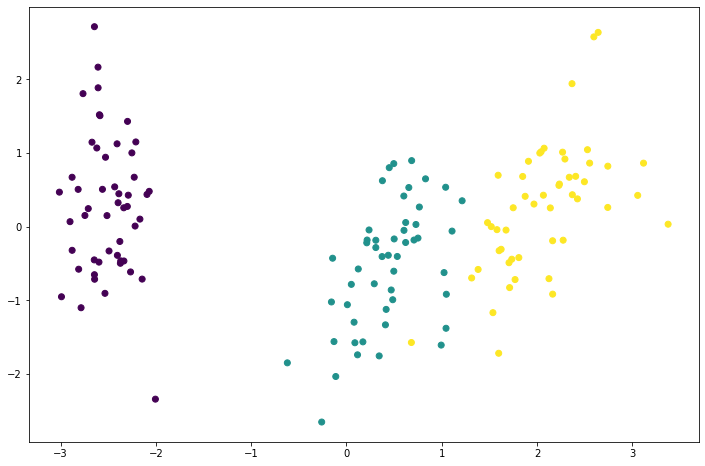

In [108]:
plt.figure(figsize=(12,8))
plt.scatter(principalComponents_iris[:, 0], principalComponents_iris[:, 1], c = y, alpha = 1)

Split X for testing and validation

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split( X, y, test_size=0.1, shuffle=True, random_state=1, stratify=y)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((135, 5), (135,), (15, 5), (15,))

Select model

In [110]:
from sklearn.gaussian_process.kernels import RBF

C = 10
kernel = 1.0 * RBF([1.0, 1.0, 1.0, 1.0, 1.0])  # for GPC

In [111]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(C=C, penalty='l1', solver='saga', multi_class='multinomial',max_iter=10000).fit(X_train, y_train)
print(model1.score(X_train, y_train))

1.0


In [112]:
pred1 = model1.predict(X_val)
print(model1.score(X_val, y_val))

1.0


In [113]:
model2 = LogisticRegression(C=C, penalty='l2', solver='saga', multi_class='multinomial',max_iter=10000).fit(X_train, y_train)
print(model2.score(X_train, y_train))

1.0


In [114]:
pred2 = model2.predict(X_val)
print(model2.score(X_val, y_val))

1.0


In [115]:
model3 = LogisticRegression(C=C, penalty='l2', solver='saga', multi_class='ovr',max_iter=10000).fit(X_train, y_train)
print(model3.score(X_train, y_train))

1.0


In [116]:
pred3 = model3.predict(X_val)
print(model3.score(X_val, y_val))

0.9333333333333333


In [117]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, pred3)

array([[5, 0, 0],
       [0, 5, 0],
       [0, 1, 4]])

In [118]:
pca_val = PCA(n_components=2)
principalComponents_val = pca_val.fit_transform(X_val)

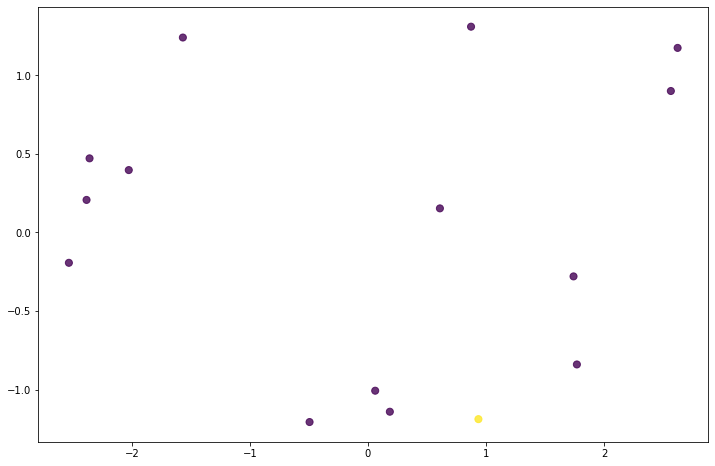

In [119]:
plt.figure(figsize = (12, 8))
plt.scatter(principalComponents_val[:, 0], principalComponents_val[:,1], c = pred3 == y_val - 1, alpha = .8, s = 50)

In [120]:
from sklearn.svm import SVC

model4 = SVC(kernel='linear', C=C, probability=True,random_state=0).fit(X_train, y_train)
print(model4.score(X_train, y_train))

1.0


In [121]:
pred4 = model4.predict(X_val)
print(model4.score(X_val, y_val))

1.0


In [122]:
from sklearn.gaussian_process import GaussianProcessClassifier

model5 = GaussianProcessClassifier(kernel).fit(X_train, y_train)
print(model5.score(X_train, y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/kernels.py:418: ConvergenceWarning: The optimal value found for dimension 2 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/kernels.py:418: ConvergenceWarning: The optimal value found for dimension 1 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/kernels.py:418: ConvergenceWarning: The optimal value found for dimension 4 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning)


1.0


In [123]:
pred5 = model5.predict(X_val)
print(model5.score(X_val, y_val))

1.0
